In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import the necessary modules
from osgeo import gdal
import numpy as np
import pandas as pd


# Open the GeoTIFF files using GDAL
datasetTrainingGT = gdal.Open('/content/drive/MyDrive/ML_Project/S2A_MSIL1C_20220516_Train_GT.tif')

# Read the data from the first GeoTIFF file into a NumPy array
trainGT2d = datasetTrainingGT.ReadAsArray()
trainGT2d = np.swapaxes(trainGT2d, 0, 1)
# Convert the 2-dimensional NumPy arrays into 2-dimensional arrays with rows and columns
trainGT1d = trainGT2d.reshape(trainGT2d.shape[0] * trainGT2d.shape[1], 1)

# Convert the combined array into a Pandas DataFrame
dfTrainLabels = pd.DataFrame(trainGT1d)

# Export the DataFrame as a CSV file
# dfTrainLabels.to_csv('train.csv', index=False)
np.save('train_gt.npy', trainGT1d)

datasetTraining = gdal.Open('/content/drive/MyDrive/ML_Project/S2A_MSIL1C_20220516_TrainingData.tif')

# Read the data from the first GeoTIFF file into a NumPy array
dataTraing = datasetTraining.ReadAsArray()
dataTraing = np.swapaxes(dataTraing, 0, 2)
# Convert the 2-dimensional NumPy arrays into 2-dimensional arrays with rows and columns
dataTraining1d = dataTraing.reshape(dataTraing.shape[0] * dataTraing.shape[1], -1)
dfTrain = pd.DataFrame(dataTraining1d)

final_data = pd.concat([dfTrainLabels, dfTrain])

train_label_data = pd.concat([dfTrainLabels, dfTrain], axis=1)
train_label_data.columns=['Code', 'Blue', 'Green', 'Red', 'NIR']
train_label_data.to_csv('train.csv')

np.save('train.npy', dataTraining1d)

datasetTest = gdal.Open('/content/drive/MyDrive/ML_Project/S2B_MSIL1C_20220528_Test.tif')

# Read the data from the first GeoTIFF file into a NumPy array
dataTest2d = datasetTest.ReadAsArray()
dataTest2d = np.swapaxes(dataTest2d, 0, 2)
# Convert the 2-dimensional NumPy arrays into 2-dimensional arrays with rows and columns
dataTest1d = dataTest2d.reshape(dataTest2d.shape[0] * dataTest2d.shape[1], -1)
np.save('test.npy', dataTest1d)
# Convert the combined array into a Pandas DataFrame
dfTest = pd.DataFrame(dataTest1d)
dfTest.columns=['Blue', 'Green', 'Red', 'NIR']
# Export the DataFrame as a CSV file
dfTest.to_csv('test.csv')

# K-Neighbors Classifier FOR TRAIN.CSV

Cross-validation accuracy: 89.80%
Accuracy: 90.25%
                        precision    recall  f1-score   support

            Tree cover       0.77      0.69      0.73       921
             Shrubland       0.77      0.60      0.68     37716
             Grassland       0.61      0.56      0.58     10212
              Cropland       0.69      0.79      0.73     70380
              Built-up       0.47      0.07      0.13      2826
Bare/sparse vegetation       0.79      0.88      0.84     93207
          Snow and ice       0.65      0.25      0.36      9759
Permanent water bodies       0.99      0.99      0.99    402398
    Herbaceous wetland       0.34      0.12      0.17      1134

              accuracy                           0.90    628553
             macro avg       0.68      0.55      0.58    628553
          weighted avg       0.90      0.90      0.90    628553

[[   635      1      0      6      0      2     14    263      0]
 [    14  22739   1919  11602     13   1331     

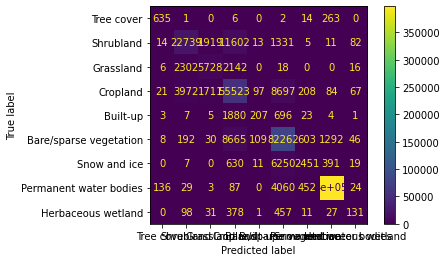

In [ ]:
from sklearn.model_selection import train_test_split
X_Test, X_Val, y_test, y_val = train_test_split(dataTraining1d, trainGT1d, stratify=trainGT1d, test_size=0.35)

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

#Create the KNN classifier with k=1
clf = KNeighborsClassifier(n_neighbors=100)

# # Use cross-validation to evaluate the model's accuracy
scores = cross_val_score(clf, X_Val, np.ravel(y_val), cv=5)

acc = scores.mean()
print(f'Cross-validation accuracy: {acc:.2%}')

# # Fit the classifier to the data
clf.fit(dataTraining1d, np.ravel(trainGT1d))

# # Predict labels for new data
predictions = clf.predict(X_Test)

# # Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2%}')

# # Compute the confusion matrix
labels = ['Tree cover', 'Shrubland', 'Grassland', 'Cropland', 'Built-up', 'Bare/sparse vegetation', 'Snow and ice','Permanent water bodies', 'Herbaceous wetland']

cm = confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions,target_names=labels))
print(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

df = pd.DataFrame(predictions)
df.index.names = ['Id']
df.columns=['Code']
 # Export the DataFrame as a CSV file
df.to_csv('/content/drive/MyDrive/ML_Project/sample-submission.csv')

# K-Neighbors Classifier FOR Test.CSV

In [ ]:
from sklearn.model_selection import train_test_split
X_Test, X_Val, y_test, y_val = train_test_split(dataTraining1d,trainGT1d , stratify=trainGT1d , test_size=0.30)

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create the KNN classifier with k=1
clf = KNeighborsClassifier(n_neighbors=1)

# Use cross-validation to evaluate the model's accuracy
scores = cross_val_score(clf, dataTraining1d, np.ravel(trainGT1d), cv=5)
acc = scores.mean()
print(f'Cross-validation accuracy: {acc:.2%}')

# Fit the classifier to the data
clf.fit(dataTraining1d, np.ravel(trainGT1d))

# Predict labels for new data
predictions = clf.predict(dataTest1d)

df = pd.DataFrame(predictions)
df.index.names = ['Id']
df.columns=['Code']
# # Export the DataFrame as a CSV file
df.to_csv('/content/drive/MyDrive/ML_Project/submission.csv')



Cross-validation accuracy: 85.54%


#BAYES METHOD FOR TRAIN.CSV

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross-validation accuracy: 83.98%
Accuracy: 83.95%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

            Tree cover       0.40      0.70      0.51       991
             Shrubland       0.40      0.38      0.39     40617
             Grassland       0.27      0.87      0.41     10998
              Cropland       0.60      0.50      0.55     75793
              Built-up       0.00      0.00      0.00      3044
Bare/sparse vegetation       0.75      0.79      0.77    100377
          Snow and ice       0.00      0.00      0.00     10510
Permanent water bodies       0.99      0.98      0.98    433351
    Herbaceous wetland       0.00      0.00      0.00      1222

              accuracy                           0.84    676903
             macro avg       0.38      0.47      0.40    676903
          weighted avg       0.84      0.84      0.84    676903



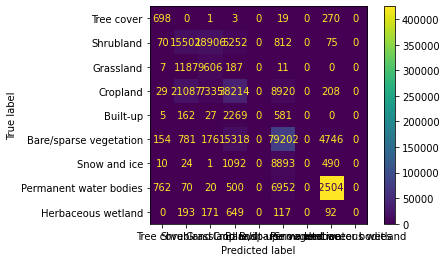

In [ ]:
from sklearn.model_selection import train_test_split
X_Test, X_Val, y_test, y_val = train_test_split(dataTraining1d, trainGT1d, stratify=trainGT1d, test_size=0.40)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

# Create the classifier object
gnb = GaussianNB()
# Fit the classifier to the data
gnb.fit(X_Val, y_val)
# Predict labels for new data
predictions = gnb.predict(X_Test)

# # Use cross-validation to evaluate the model's accuracy
scores = cross_val_score(gnb, X_Val, np.ravel(y_val), cv=5)
acc = scores.mean()
print(f'Cross-validation accuracy: {acc:.2%}')

# # Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2%}')

# # Compute the confusion matrix
labels = ['Tree cover', 'Shrubland', 'Grassland', 'Cropland', 'Built-up', 'Bare/sparse vegetation', 'Snow and ice','Permanent water bodies', 'Herbaceous wetland']

cm = confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions,target_names=labels))
#print(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

df = pd.DataFrame(predictions)
df.index.names = ['Id']
df.columns=['Code']
 # Export the DataFrame as a CSV file
df.to_csv('/content/drive/MyDrive/ML_Project/bayes-submission.csv')

# BAYES METHOD FOR TEST.CSV

In [ ]:
from sklearn.model_selection import train_test_split
X_Test, X_Val, y_test, y_val = train_test_split(dataTraining1d, trainGT1d, stratify=trainGT1d, test_size=0.40)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

# Create the classifier object
gnb = GaussianNB()
# Fit the classifier to the data
gnb.fit(X_Val, y_val)
# Predict labels for new data
predictions = gnb.predict(dataTest1d)

# # Use cross-validation to evaluate the model's accuracy
scores = cross_val_score(gnb, X_Val, np.ravel(y_val), cv=5)
acc = scores.mean()
print(f'Cross-validation accuracy: {acc:.2%}')

# # Compute the confusion matrix
labels = ['Tree cover', 'Shrubland', 'Grassland', 'Cropland', 'Built-up', 'Bare/sparse vegetation', 'Snow and ice','Permanent water bodies', 'Herbaceous wetland']

df = pd.DataFrame(predictions)
df.index.names = ['Id']
df.columns=['Code']
 # Export the DataFrame as a CSV file
df.to_csv('/content/drive/MyDrive/ML_Project/bayes-submission.csv')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross-validation accuracy: 84.05%


#RANDOM FOREST CLASSIFIER FOR TRAIN.CSV 

Cross-validation accuracy: 88.82%
Accuracy: 99.97%
                        precision    recall  f1-score   support

            Tree cover       0.82      1.00      0.90      1416
             Shrubland       1.00      1.00      1.00     58025
             Grassland       1.00      1.00      1.00     15711
              Cropland       1.00      1.00      1.00    108276
              Built-up       1.00      1.00      1.00      4348
Bare/sparse vegetation       1.00      1.00      1.00    143396
          Snow and ice       1.00      1.00      1.00     15014
Permanent water bodies       1.00      1.00      1.00    619074
    Herbaceous wetland       1.00      1.00      1.00      1745

              accuracy                           1.00    967005
             macro avg       0.98      1.00      0.99    967005
          weighted avg       1.00      1.00      1.00    967005



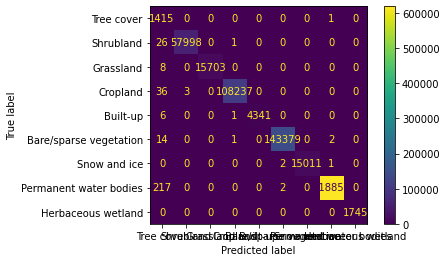

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataTraining1d, trainGT1d, stratify=trainGT1d, test_size=0.35)

# # Train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# # Use cross-validation to evaluate the model's accuracy
scores = cross_val_score(clf, dataTraining1d, np.ravel(trainGT1d), cv=5)
acc = scores.mean()
print(f'Cross-validation accuracy: {acc:.2%}')


# # Fit the classifier to the data
clf.fit(dataTraining1d, np.ravel(trainGT1d))

# # Make predictions on the new data 
predictions = clf.predict(dataTraining1d)

# # Evaluate the accuracy of the classifier
accuracy = accuracy_score(trainGT1d, predictions)
print(f'Accuracy: {accuracy:.2%}')

# # Compute the confusion matrix
labels = ['Tree cover', 'Shrubland', 'Grassland', 'Cropland', 'Built-up', 'Bare/sparse vegetation', 'Snow and ice','Permanent water bodies', 'Herbaceous wetland']

cm = confusion_matrix(trainGT1d, predictions)
print(classification_report(trainGT1d, predictions,target_names=labels))
#print(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

df = pd.DataFrame(predictions)
df.index.names = ['Id']
df.columns=['Code']
 # Export the DataFrame as a CSV file
df.to_csv('/content/drive/MyDrive/ML_Project/RandomForest-submission.csv')

#RANDOM FOREST FOR TEST.CSV

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataTraining1d, trainGT1d, stratify=trainGT1d, test_size=0.40)

# # Train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# # Fit the classifier to the data
clf.fit(dataTraining1d, np.ravel(trainGT1d))

# # Make predictions on the new data 
predictions = clf.predict(dataTest1d)

df = pd.DataFrame(predictions)
df.index.names = ['Id']
df.columns=['Code']
 # Export the DataFrame as a CSV file
df.to_csv('/content/drive/MyDrive/ML_Project/RandomForestTest-submission.csv')

#K-Means For Train.CSV 

Cross-validation accuracy: -4907636244938.29%
Accuracy: 0.14%


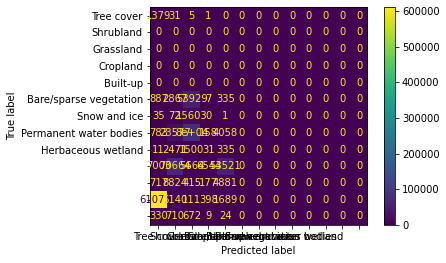

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataTraining1d, trainGT1d, stratify=trainGT1d, test_size=0.40)


# Create the MiniBatchKMeans model
kmeans = MiniBatchKMeans(n_clusters=5, batch_size=1000)

# Use cross-validation to evaluate the model's accuracy
scores = cross_val_score(kmeans, dataTraining1d, np.ravel(trainGT1d), cv=5)
acc = scores.mean()
print(f'Cross-validation accuracy: {acc:.2%}')


# Fit the model to the data
kmeans.fit(X_train, np.ravel(y_train))

# Predict the cluster labels for new data
predictions = kmeans.predict(dataTraining1d)

# # Evaluate the accuracy of the classifier
accuracy = accuracy_score(trainGT1d, predictions)
print(f'Accuracy: {accuracy:.2%}')

# # Compute the confusion matrix
labels = ['Tree cover', 'Shrubland', 'Grassland', 'Cropland', 'Built-up', 'Bare/sparse vegetation', 'Snow and ice','Permanent water bodies', 'Herbaceous wetland']

cm = confusion_matrix(trainGT1d, predictions)
#print(classification_report(y_train, predictions,target_names=labels))
#print(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

# Save the predictions as a DataFrame
df = pd.DataFrame(predictions)
df.index.names = ['Id']
df.columns=['Code']

# Export the DataFrame as a CSV file
df.to_csv('/content/drive/MyDrive/ML_Project/Kmeans_Train_predictions.csv')


#K-Means For Test.CSV 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.cluster import MiniBatchKMeans
# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataTraining1d, trainGT1d, stratify=trainGT1d, test_size=0.40)

# Create the MiniBatchKMeans model
kmeans = MiniBatchKMeans(n_clusters=9, batch_size=10000)

# Fit the model to the data
kmeans.fit(dataTraining1d, np.ravel(trainGT1d))

# Predict the cluster labels for new data
predictions = kmeans.predict(dataTest1d)

# Save the predictions as a DataFrame
df = pd.DataFrame(predictions)
df.index.names = ['Id']
df.columns=['Code']

# Export the DataFrame as a CSV file
df.to_csv('/content/drive/MyDrive/ML_Project/kmeansTest_predictions.csv')


#Boosted Mlp For Train.Csv

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier


# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataTraining1d, trainGT1d, stratify=trainGT1d, test_size=0.40)

# Create an MLP classifier with 3 hidden layers of 100 neurons each
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100))

# Create an AdaBoost classifier using the MLP as the base estimator
boosted_mlp = AdaBoostClassifier(base_estimator=mlp)

# Fit the classifier to the training data
boosted_mlp.fit(dataTraining1d, np.ravel(trainGT1d))

# Predict labels for the test data
predictions = boosted_mlp.predict(dataTraining1d)

# # Evaluate the accuracy of the classifier
accuracy = accuracy_score(trainGT1d, predictions)
print(f'Accuracy: {accuracy:.2%}')

# # Compute the confusion matrix
labels = ['Tree cover', 'Shrubland', 'Grassland', 'Cropland', 'Built-up', 'Bare/sparse vegetation', 'Snow and ice','Permanent water bodies', 'Herbaceous wetland']

cm = confusion_matrix(trainGT1d, predictions)
print(classification_report(trainGT1d, predictions,target_names=labels))
#print(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

df = pd.DataFrame(predictions)
df.index.names = ['Id']
df.columns=['Code']
 # Export the DataFrame as a CSV file
df.to_csv('/content/drive/MyDrive/ML_Project/Boosted_Mlp_Train_Submission.csv')

#Boosted Mlp For Test.Csv

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier


# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataTraining1d, trainGT1d, stratify=trainGT1d, test_size=0.40)

# Create an MLP classifier with 3 hidden layers of 100 neurons each
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100))

# Create an AdaBoost classifier using the MLP as the base estimator
boosted_mlp = AdaBoostClassifier(base_estimator=mlp)

# Fit the classifier to the training data
boosted_mlp.fit(dataTraining1d, np.ravel(trainGT1d))

# Predict labels for the test data
predictions = boosted_mlp.predict(dataTest1d)

df = pd.DataFrame(predictions)
df.index.names = ['Id']
df.columns=['Code']
 # Export the DataFrame as a CSV file
df.to_csv('/content/drive/MyDrive/ML_Project/BoostedMlpTest-submission.csv')

ValueError: ignored

#Boosted Gradient For Train.Csv

Cross-validation accuracy: 89.01%
520.7706570625305
Accuracy: 89.77%
                        precision    recall  f1-score   support

            Tree cover       0.76      0.70      0.73      1416
             Shrubland       0.76      0.60      0.67     58025
             Grassland       0.62      0.54      0.58     15711
              Cropland       0.68      0.75      0.72    108276
              Built-up       0.40      0.00      0.00      4348
Bare/sparse vegetation       0.77      0.89      0.82    143396
          Snow and ice       0.67      0.19      0.29     15014
Permanent water bodies       0.99      0.99      0.99    619074
    Herbaceous wetland       0.38      0.08      0.13      1745

              accuracy                           0.90    967005
             macro avg       0.67      0.53      0.55    967005
          weighted avg       0.90      0.90      0.89    967005



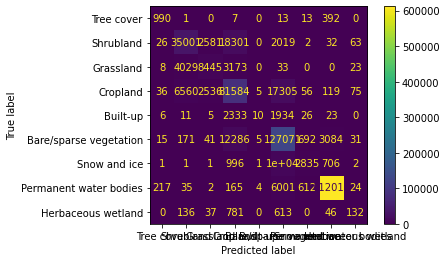

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.multiclass import OneVsRestClassifier


# # Split the data into training and testing sets
X_Val, X_Train, y_val, y_Train = train_test_split(dataTraining1d, trainGT1d, stratify=trainGT1d, test_size=0.50)

clf = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=100, random_state=42), n_jobs=-1)

# # Use cross-validation to evaluate the model's accuracy
scores = cross_val_score(clf, dataTraining1d, np.ravel(trainGT1d), cv=5)
acc = scores.mean()
print(f'Cross-validation accuracy: {acc:.2%}')


# Initialize the gradient boosting classifier
#clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
import time

start_time = time.time()
# Fit the classifier to the data
clf.fit(X_Train, np.ravel(y_Train))


# Create a synthetic dataset for classification
#dataTraining1d, y = make_classification(n_samples=967005, n_features=10, n_classes=2)


elapsed_time = time.time() - start_time

print(elapsed_time)

# Predict labels for new data
predictions = clf.predict(dataTraining1d)


# # Evaluate the accuracy of the classifier
accuracy = accuracy_score(trainGT1d, predictions)
print(f'Accuracy: {accuracy:.2%}')

# # Compute the confusion matrix
labels = ['Tree cover', 'Shrubland', 'Grassland', 'Cropland', 'Built-up', 'Bare/sparse vegetation', 'Snow and ice','Permanent water bodies', 'Herbaceous wetland']

cm = confusion_matrix(trainGT1d, predictions)
print(classification_report(trainGT1d, predictions,target_names=labels))
#print(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

df = pd.DataFrame(predictions)
df.index.names = ['Id']
df.columns=['Code']
 # Export the DataFrame as a CSV file
df.to_csv('/content/drive/MyDrive/ML_Project/BoostedGradientTrain-submission.csv')

#Boosted Gradient For Test.csv

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.multiclass import OneVsRestClassifier

# # Split the data into training and testing sets
X_Val, X_Train, y_val, y_Train = train_test_split(dataTraining1d, trainGT1d, stratify=trainGT1d, test_size=0.50)

clf = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=100, random_state=42), n_jobs=-1)

# Fit the classifier to the data
clf.fit(X_Train, np.ravel(y_Train))


# Predict labels for new data
predictions = clf.predict(dataTest1d)

df = pd.DataFrame(predictions)
df.index.names = ['Id']
df.columns=['Code']
 # Export the DataFrame as a CSV file
df.to_csv('/content/drive/MyDrive/ML_Project/BoostedGradientTest-submission.csv')

#Bagged MLP For Test.csv

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification



# # Split the data into training and testing sets
X_Val, X_Train, y_val, y_Train = train_test_split(dataTraining1d, trainGT1d, stratify=trainGT1d, test_size=0.50)

# generate some sample data
dataTest1d, y_Train = make_classification(n_samples=4620309, n_features=20, n_classes=2)

# create the base MLP classifier
base_mlp = MLPClassifier(hidden_layer_sizes=(50, 50))

# create the bagging classifier
bagged_mlp = BaggingClassifier(base_estimator=base_mlp, n_estimators=10, max_samples=0.8, max_features=0.8)

# fit the bagged classifier to the data
bagged_mlp.fit(dataTest1d, y_Train)

# make predictions on new data
predictions = bagged_mlp.predict(dataTest1d)


df = pd.DataFrame(predictions)
df.index.names = ['Id']
df.columns=['Code']
 # Export the DataFrame as a CSV file
df.to_csv('/content/drive/MyDrive/ML_Project/BaggedMlpTest-submission.csv')

#Bagged MLP For Train.csv

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification



# # Split the data into training and testing sets
X_Val, X_Train, y_val, y_Train = train_test_split(dataTraining1d, trainGT1d, stratify=trainGT1d, test_size=0.50)

# generate some sample data
dataTraining1d, y = make_classification(n_samples=967005, n_features=20, n_classes=2)

# create the base MLP classifier
base_mlp = MLPClassifier(hidden_layer_sizes=(50, 50))

# create the bagging classifier
bagged_mlp = BaggingClassifier(base_estimator=base_mlp, n_estimators=10, max_samples=0.8, max_features=0.8)

# fit the bagged classifier to the data
bagged_mlp.fit(dataTraining1d, y)

# make predictions on new data
predictions = bagged_mlp.predict(dataTraining1d)

# # Evaluate the accuracy of the classifier
accuracy = accuracy_score(trainGT1d, predictions)
print(f'Accuracy: {accuracy:.2%}')

# # Compute the confusion matrix
labels = ['Tree cover', 'Shrubland', 'Grassland', 'Cropland', 'Built-up', 'Bare/sparse vegetation', 'Snow and ice','Permanent water bodies', 'Herbaceous wetland']

cm = confusion_matrix(trainGT1d, predictions)
print(classification_report(trainGT1d, predictions,target_names=labels))
#print(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

df = pd.DataFrame(predictions)
df.index.names = ['Id']
df.columns=['Code']
 # Export the DataFrame as a CSV file
df.to_csv('/content/drive/MyDrive/ML_Project/BaggedMlpTrain-submission.csv')

Accuracy: 0.07%


ValueError: ignored

#SVM Classifier For Train.Csv

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 88.75%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

            Tree cover       0.76      0.70      0.73      1416
             Shrubland       0.59      0.70      0.64     58025
             Grassland       0.00      0.00      0.00     15711
              Cropland       0.70      0.71      0.71    108276
              Built-up       0.00      0.00      0.00      4348
Bare/sparse vegetation       0.75      0.89      0.81    143396
          Snow and ice       0.00      0.00      0.00     15014
Permanent water bodies       0.99      0.99      0.99    619074
    Herbaceous wetland       0.00      0.00      0.00      1745

              accuracy                           0.89    967005
             macro avg       0.42      0.44      0.43    967005
          weighted avg       0.86      0.89      0.87    967005



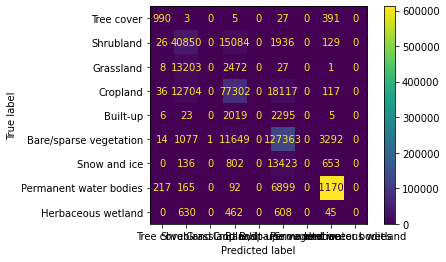

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataTraining1d, trainGT1d, stratify=trainGT1d, test_size=0.40)
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

  #Create a pipeline with the StandardScaler and the SVM classifier
clf = Pipeline([
     ('scaler', StandardScaler()),
     ('svm', svm.SVC(kernel='linear', C=1, random_state=42))
 ])

# # Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(dataTraining1d, trainGT1d, test_size=0.3, random_state=42)

# # Use cross-validation to evaluate the model's accuracy
scores = cross_val_score(clf, X_test, np.ravel(y_test), cv=5)

acc = scores.mean()
print(f'Cross-validation accuracy: {acc:.2%}')

# # Fit the pipeline to the training data
clf.fit(X_train, y_train)

# # Predict labels for the test data
predictions = clf.predict(dataTraining1d)

# # Evaluate the accuracy of the classifier
accuracy = accuracy_score(trainGT1d, predictions)
print(f'Accuracy: {accuracy:.2%}')

# # Compute the confusion matrix
labels = ['Tree cover', 'Shrubland', 'Grassland', 'Cropland', 'Built-up', 'Bare/sparse vegetation', 'Snow and ice','Permanent water bodies', 'Herbaceous wetland']

cm = confusion_matrix(trainGT1d, predictions)
print(classification_report(trainGT1d, predictions,target_names=labels))
#print(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

df = pd.DataFrame(predictions)
df.index.names = ['Id']
df.columns=['Code']

# Export the DataFrame as a CSV file
df.to_csv('/content/drive/MyDrive/ML_Project/SVM_Train_Predictions.csv')


#SVM Classifier For Test.Csv

In [ ]:
from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataTraining1d, trainGT1d, stratify=trainGT1d, test_size=0.40)

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

  #Create a pipeline with the StandardScaler and the SVM classifier
clf = Pipeline([
     ('scaler', StandardScaler()),
     ('svm', svm.SVC(kernel='linear', C=1, random_state=42))
 ])

# # Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(dataTraining1d, trainGT1d, test_size=0.3, random_state=42)

# # Fit the pipeline to the training data
clf.fit(X_train, y_train)

# # Predict labels for the test data
predictions = clf.predict(dataTest1d)

# Save the predictions as a DataFrame
df = pd.DataFrame(predictions)
df.index.names = ['Id']
df.columns=['Code']

# Export the DataFrame as a CSV file
df.to_csv('/content/drive/MyDrive/ML_Project/SVM_Test_Predictions.csv')
